<a href="https://colab.research.google.com/github/AIgbine/Sample_TrollTweet_Analysis/blob/main/Sample_Tweets_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re

# plotting image with word cloud
from PIL import Image                    # for our images
import numpy as np                       # convert image to np arrays
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS # generate word cloud
import matplotlib.pyplot as plt          # plotting
import seaborn as sns

# nlp
import nltk                              # text processing
from nltk import word_tokenize           # split sentence into list of words
from nltk.corpus import stopwords        # remove: and,it,i,etc
import string                            # remove punctuation
from collections import defaultdict      # dictionary with values as lists
from nltk.stem import WordNetLemmatizer  # remove word endings etc

%matplotlib inline

In [ ]:
data = pd.read_csv('sample_tweets.csv')
data.head()

,Unnamed: 0,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,0,ADNNELSTR,The empty podium says it all. The Marxists are...,Unknown,English,8/13/2017 21:00,946,83,NaN,Right,0,RightTroll,896838937028775937,http://twitter.com/893370639309996032/statuses...,https://twitter.com/i/web/status/8968383433838...,NaN,NaN
1,1,ATLANTA_ONLINE,"Dust in your house may have toxic chemicals, s...",United States,English,9/15/2016 3:34,7825,17383,NaN,local,0,NewsFeed,776262908388839424,http://twitter.com/Atlanta_Online/statuses/776...,http://on-ajc.com/2coKeyO,NaN,NaN
2,2,ANTONHAYHAY,singers Get 1 million soundcloud plays for $45...,United States,English,3/3/2017 20:41,303,711,RETWEET,Left,1,LeftTroll,837764807826763781,http://twitter.com/1652262638/statuses/8377648...,https://twitter.com/jayceodpromoter/status/837...,http://bit.ly/2m4KZPJ,NaN
3,3,AMELIEBALDWIN,.@JohnsonHildy may be on to something about th...,United States,English,2/23/2017 2:05,2322,2743,RETWEET,Right,1,RightTroll,834584872111001601,http://twitter.com/1679279490/statuses/8345848...,http://www.washingtonexaminer.com/james-okeefe...,NaN,NaN
4,4,AMELIEBALDWIN,".@ViolaDavis just made #Oscars history, and it...",United States,English,1/25/2017 9:36,2340,2726,RETWEET,Right,1,RightTroll,824189182897754117,http://twitter.com/1679279490/statuses/8241891...,https://twitter.com/hellogiggles/status/824184...,http://trib.al/adflVAC,NaN


In [ ]:
data.columns.values[0] = "id"

In [ ]:
import re
#Clean url in the tweets
text_wo_http=[]
for i in data['content']:
    re_pattern=r'\b(?:http).+\b'
    re_p=r'http\S+'
    if type(i)==str and re.findall(re_pattern,i):
        text_wo_http.append(re.sub(re_p,'',i))
    else:
        text_wo_http.append(i)
        
len(text_wo_http )

47708

In [ ]:
data['content without http']=text_wo_http

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47708 entries, 0 to 47707
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    47708 non-null  int64 
 1   author                47708 non-null  object
 2   content               47708 non-null  object
 3   region                47704 non-null  object
 4   language              47708 non-null  object
 5   publish_date          47708 non-null  object
 6   following             47708 non-null  int64 
 7   followers             47708 non-null  int64 
 8   post_type             26525 non-null  object
 9   account_type          47708 non-null  object
 10  retweet               47708 non-null  int64 
 11  account_category      47708 non-null  object
 12  tweet_id              47708 non-null  int64 
 13  article_url           47708 non-null  object
 14  tco1_step1            33206 non-null  object
 15  tco2_step1            12505 non-null

In [ ]:
#Data Cleaning
data['post_type'].fillna(value='TWEET',inplace = True)

data['region'].fillna(value='Unknown',inplace = True)

data['account_type']=data['account_type'].\
replace('?','Unknown')

In [ ]:
data.isnull().sum()

id                          0
author                      0
content                     0
region                      0
language                    0
publish_date                0
following                   0
followers                   0
post_type                   0
account_type                0
retweet                     0
account_category            0
tweet_id                    0
article_url                 0
tco1_step1              14502
tco2_step1              35203
tco3_step1              47051
content without http        0
dtype: int64

In [ ]:
#We can't analyze links with nlp so we get rid of the folowing columns:

data=data.drop(['tco1_step1',
                    'tco2_step1','tco3_step1','article_url'],axis=1)
data.head()

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,content without http
0,0,ADNNELSTR,The empty podium says it all. The Marxists are...,Unknown,English,8/13/2017 21:00,946,83,TWEET,Right,0,RightTroll,896838937028775937,The empty podium says it all. The Marxists are...
1,1,ATLANTA_ONLINE,"Dust in your house may have toxic chemicals, s...",United States,English,9/15/2016 3:34,7825,17383,TWEET,local,0,NewsFeed,776262908388839424,"Dust in your house may have toxic chemicals, s..."
2,2,ANTONHAYHAY,singers Get 1 million soundcloud plays for $45...,United States,English,3/3/2017 20:41,303,711,RETWEET,Left,1,LeftTroll,837764807826763781,singers Get 1 million soundcloud plays for $45...
3,3,AMELIEBALDWIN,.@JohnsonHildy may be on to something about th...,United States,English,2/23/2017 2:05,2322,2743,RETWEET,Right,1,RightTroll,834584872111001601,.@JohnsonHildy may be on to something about th...
4,4,AMELIEBALDWIN,".@ViolaDavis just made #Oscars history, and it...",United States,English,1/25/2017 9:36,2340,2726,RETWEET,Right,1,RightTroll,824189182897754117,".@ViolaDavis just made #Oscars history, and it..."


In [ ]:
data['tweet_id'].value_counts().sum()

47708

In [ ]:
#Clean url in the tweets
str_repl=[]
for i in data['content without http']:
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    i = i.lower()
    i = re.sub('\[.*?\]', '', i)
    i = re.sub('[%s]' % re.escape(string.punctuation), '', i)
    i = re.sub('\w*\d\w*', '', i)
    i = re.sub('[‘’“”…]', '', i)
    i = re.sub('\n', '', i)
    str_repl.append(i)
        


In [ ]:
str_repl[:3]

['the empty podium says it all the marxists are losing ground amp dont like it stand up for freedom amp join at ',
 'dust in your house may have toxic chemicals study says  breaking',
 'singers get  million soundcloud plays for  click here for more details  we do youtube views too spinrilla ']

In [ ]:
data['content without http']=str_repl

In [ ]:
data.head()

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,content without http
0,0,ADNNELSTR,The empty podium says it all. The Marxists are...,Unknown,English,8/13/2017 21:00,946,83,TWEET,Right,0,RightTroll,896838937028775937,the empty podium says it all the marxists are ...
1,1,ATLANTA_ONLINE,"Dust in your house may have toxic chemicals, s...",United States,English,9/15/2016 3:34,7825,17383,TWEET,local,0,NewsFeed,776262908388839424,dust in your house may have toxic chemicals st...
2,2,ANTONHAYHAY,singers Get 1 million soundcloud plays for $45...,United States,English,3/3/2017 20:41,303,711,RETWEET,Left,1,LeftTroll,837764807826763781,singers get million soundcloud plays for cli...
3,3,AMELIEBALDWIN,.@JohnsonHildy may be on to something about th...,United States,English,2/23/2017 2:05,2322,2743,RETWEET,Right,1,RightTroll,834584872111001601,johnsonhildy may be on to something about the ...
4,4,AMELIEBALDWIN,".@ViolaDavis just made #Oscars history, and it...",United States,English,1/25/2017 9:36,2340,2726,RETWEET,Right,1,RightTroll,824189182897754117,violadavis just made oscars history and its fo...


In [ ]:
eng_tweets=data[data['language']=='English']
#From our previous EDA, we found that majority of the tweets were in English
#Also most of the tweets during the spike were English tweets so we will work with English tweets
eng_tweets.shape

(47016, 14)

In [ ]:
eng_tweets['author'].unique()

array(['ADNNELSTR', 'ATLANTA_ONLINE', 'ANTONHAYHAY', 'AMELIEBALDWIN',
       'ARM_2_ALAN', 'ANNIEPOSHES', 'ALEXXDRTRR', 'ARABMTR',
       'ABIGAILSSILK', 'ANDYHASHTAGGER', 'ACEJINEV', 'ALECMOOOOODY',
       'ANAAISLEC', 'ADRIENNE_GG', 'ALYSSABEDOLLA', '4MYSQUAD',
       'ARIELLE_BROWNIN', 'ADDIE_HOL', 'ADRGREERR', 'AFEELIUTR',
       'AMBERLINETR', 'ANIIANTRS', 'ARGENTINACATLE1', 'ALDRICH420',
       'AMYYSLEGENTR', 'ARIAANST', 'AMANDAVGREEN', 'ALANISSTRS',
       'AURRLISTR', 'ANDRISNABRT', 'ANDIOSMARRTRUMP', 'ALIISTRR',
       'ANISILOPE', 'ASWWIMMORRIS', '10_GOP', 'AMCONVOICE',
       'ARIELSHINING', 'ANNAMINGT', 'AMYYTHOSSMA', 'ANTONRUMSS',
       'ANISACRRUTR', 'AMELINAASTR', 'ANGTHEESTR', 'AIDEN7757',
       'ANDYDREWDANIELS', 'ADRIANAMFTTT', 'ABIISSROSB', 'ARTEMSSFE',
       'AMIISTRS', 'ARCHIEOLIVERS', 'ANAALESSIS', 'AMERICANALBERT',
       'ALESSIAWILLSON', 'AARONALLENALL', 'ALBUQUERQUEON', 'ANDRREETRT',
       'ANASTASSITR', 'AMBERRPAR', 'ADAMCHAPMANJR', 'ARIEENSLPE',
       

In [ ]:
# Friend To Follower Ratios: 
eng_tweets['follower_to_following_Ratio']=np.where(eng_tweets['followers']/\
                        eng_tweets['following']==np.inf
                     , eng_tweets['followers'], 
         eng_tweets['followers']/eng_tweets['following'])


print('Proportion of Users w/ High Follower Count (ALL-SUBset data):',\
round(eng_tweets[eng_tweets['follower_to_following_Ratio']>2].shape[0]/\
eng_tweets[eng_tweets['follower_to_following_Ratio']<2].shape[0],3))

Proportion of Users w/ High Follower Count (ALL-SUBset data): 0.17


<ipython-input-17-115b8104706c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_tweets['follower_to_following_Ratio']=np.where(eng_tweets['followers']/\


In [ ]:
eng_tweets.sort_values('follower_to_following_Ratio',ascending=False)[:10]

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,content without http,follower_to_following_Ratio
12858,12879,ANIIANTRS,Jane Fonda Declared That She’s ‘Not Proud of A...,Unknown,English,10/17/2017 17:31,0,1514,TWEET,Right,0,RightTroll,920341627167797248,jane fonda declared that shes not proud of ame...,1514.0
761,762,ANIIANTRS,Varney – Media Will Keep Losing Credibility Ov...,Unknown,English,10/18/2017 1:06,0,1502,TWEET,Right,0,RightTroll,920455965060804609,varney – media will keep losing credibility ov...,1502.0
36554,36611,ANIIANTRS,Jimmy Kimmel Admits That He’s ‘One of the BIGG...,Unknown,English,10/18/2017 1:11,0,1502,TWEET,Right,0,RightTroll,920457171552358400,jimmy kimmel admits that hes one of the bigges...,1502.0
8108,8122,ANIIANTRS,BREAKING: Monica Lewinsky’s ‘Sexual Assault’ V...,Unknown,English,10/18/2017 1:11,0,1502,TWEET,Right,0,RightTroll,920457169694351360,breaking monica lewinskys sexual assault victi...,1502.0
25962,26002,ANIIANTRS,What He Read On The Card From His Wife Freaked...,Unknown,English,10/18/2017 3:02,1,1497,TWEET,Right,0,RightTroll,920485262517592069,what he read on the card from his wife freaked...,1497.0
34346,34400,ANIIANTRS,15 Pets That Are Thoroughly Unimpressed With T...,Unknown,English,10/18/2017 3:16,1,1497,TWEET,Right,0,RightTroll,920488615817437189,pets that are thoroughly unimpressed with the...,1497.0
31233,31284,ANIIANTRS,BREAKING: Trump Admin to Pour $26 Million into...,Unknown,English,10/18/2017 11:26,1,1489,TWEET,Right,0,RightTroll,920612059628298240,breaking trump admin to pour million into cle...,1489.0
30331,30381,ANIIANTRS,BREAKING VIDEO: Bombshell Report Exposes the R...,Unknown,English,10/18/2017 11:06,1,1488,TWEET,Right,0,RightTroll,920606962999578624,breaking video bombshell report exposes the re...,1488.0
13148,13170,ANIIANTRS,BREAKING VIDEO: Thousands of Huma Abedin Files...,Unknown,English,10/18/2017 11:16,1,1488,TWEET,Right,0,RightTroll,920609619847909377,breaking video thousands of huma abedin files ...,1488.0
37846,37903,ANIIANTRS,Hillary Encourages NFL Players to Keep Kneelin...,Unknown,English,10/18/2017 11:36,1,1487,TWEET,Right,0,RightTroll,920614549178503168,hillary encourages nfl players to keep kneeling,1487.0


In [ ]:
#Top English Users by Number of Followers/Following Ratio
eng_tweets.sort_values('follower_to_following_Ratio',ascending=False)[:500]['author'].unique()

array(['ANIIANTRS', 'ACEJINEV', 'ADAM_MATHISSS', 'AMELINAASTR',
       'ARGENTINACATLE1', 'ARCHIEOLIVERS', 'ANAAISLEC', '10_GOP',
       'ASHLEEYWES', 'ANGELISTRR', 'ANDEERLWR', 'ANGEELISTR',
       'ALBUQUERQUEON', 'ANDRREETRT', 'ALIISTRR', 'ANGTHEESTR',
       'AMELCREECH', 'ATLANTA_ONLINE', 'ANNIEPOSHES', 'ARIEENSLPE',
       'APRRILSBRUSS', 'ABOUTPOLIT', 'ARM_2_ALAN'], dtype=object)

In [ ]:
#Who Comes Up The Most for Reteeting
eng_tweets[eng_tweets['retweet']==1]['author'].value_counts()[:10]

AMELIEBALDWIN     8131
ARM_2_ALAN        3658
ANTONHAYHAY       2427
ALECMOOOOODY      2036
ANDYHASHTAGGER    1541
ACEJINEV          1397
AMANDAVGREEN       842
ALDRICH420         759
ANNIEPOSHES        553
AIDEN7757          518
Name: author, dtype: int64

In [ ]:
# Proportion of their total tweets being retweets
eng_ppl=list(eng_tweets[eng_tweets['retweet']==1]['author'].value_counts()[:10].index)

e=[]
for i in eng_ppl:
    e.append(eng_tweets[(eng_tweets['retweet']==1)&\
    (eng_tweets['author']==i)]['author'].value_counts()/\
    eng_tweets[eng_tweets['author']==i].shape[0])

e

[AMELIEBALDWIN    0.96316
 Name: author, dtype: float64,
 ARM_2_ALAN    0.991328
 Name: author, dtype: float64,
 ANTONHAYHAY    0.940698
 Name: author, dtype: float64,
 ALECMOOOOODY    0.952292
 Name: author, dtype: float64,
 ANDYHASHTAGGER    0.659675
 Name: author, dtype: float64,
 ACEJINEV    0.9357
 Name: author, dtype: float64,
 AMANDAVGREEN    0.781076
 Name: author, dtype: float64,
 ALDRICH420    0.85957
 Name: author, dtype: float64,
 ANNIEPOSHES    0.771269
 Name: author, dtype: float64,
 AIDEN7757    0.617402
 Name: author, dtype: float64]

In [ ]:
#create a new row in tweets containing the screen_name of the user who is being retweeted if applicable
eng_tweets['RT_source'] = eng_tweets['content'].str.extract(r'@(\S+):')
eng_tweets['RT_source'].fillna('None',inplace=True)
                      
eng_tweets['RT_source'].head()

<ipython-input-22-6dd578a486ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_tweets['RT_source'] = eng_tweets['content'].str.extract(r'@(\S+):')
C:\Users\ANITA\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


0    None
1    None
2    None
3    None
4    None
Name: RT_source, dtype: object

In [ ]:
eng_tweets['RT_source'].value_counts()

None               46500
realDonaldTrump        9
jstines3               8
POTUS                  6
2AFight                4
                   ...  
Love4Military          1
OrgasmicJaidon         1
sdv92                  1
HiCaliberLilGal        1
LifeSite               1
Name: RT_source, Length: 425, dtype: int64

In [ ]:
#create a new row in tweets containing the screen_name of the user who is being retweeted if applicable
eng_tweets['hashtags'] = eng_tweets['content'].str.extract(r'#(\S+):')
eng_tweets['hashtags'].fillna('None',inplace=True)
                      
eng_tweets['hashtags'].head()

<ipython-input-24-26b526a1a144>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_tweets['hashtags'] = eng_tweets['content'].str.extract(r'#(\S+):')


0    None
1    None
2    None
3    None
4    None
Name: hashtags, dtype: object

In [ ]:
eng_tweets['hashtags'].value_counts()

None          46767
NowPlaying       47
Periscope        16
NP                9
BREAKING          7
              ...  
MOOD              1
France            1
AP10Things        1
Israel            1
NEGROPEAN         1
Name: hashtags, Length: 148, dtype: int64

In [ ]:
eng_tweets['account_category'].value_counts()

RightTroll      28406
LeftTroll        8884
HashtagGamer     6782
NewsFeed         2708
Unknown           143
Fearmonger         93
Name: account_category, dtype: int64

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmeans = KMeans(n_clusters=6)

In [ ]:
data.shape

(47708, 14)

In [ ]:
data.head()

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,content without http
0,0,ADNNELSTR,The empty podium says it all. The Marxists are...,Unknown,English,8/13/2017 21:00,946,83,TWEET,Right,0,RightTroll,896838937028775937,the empty podium says it all the marxists are ...
1,1,ATLANTA_ONLINE,"Dust in your house may have toxic chemicals, s...",United States,English,9/15/2016 3:34,7825,17383,TWEET,local,0,NewsFeed,776262908388839424,dust in your house may have toxic chemicals st...
2,2,ANTONHAYHAY,singers Get 1 million soundcloud plays for $45...,United States,English,3/3/2017 20:41,303,711,RETWEET,Left,1,LeftTroll,837764807826763781,singers get million soundcloud plays for cli...
3,3,AMELIEBALDWIN,.@JohnsonHildy may be on to something about th...,United States,English,2/23/2017 2:05,2322,2743,RETWEET,Right,1,RightTroll,834584872111001601,johnsonhildy may be on to something about the ...
4,4,AMELIEBALDWIN,".@ViolaDavis just made #Oscars history, and it...",United States,English,1/25/2017 9:36,2340,2726,RETWEET,Right,1,RightTroll,824189182897754117,violadavis just made oscars history and its fo...


In [ ]:
data.isnull().sum()

id                      0
author                  0
content                 0
region                  0
language                0
publish_date            0
following               0
followers               0
post_type               0
account_type            0
retweet                 0
account_category        0
tweet_id                0
content without http    0
dtype: int64

### Understand what is being said and how the information is flowing
Illustrate how this tweet network is working
Show the people from top down trickling tweets
Using Top 10 Tweets

In [ ]:
# Convert str to date/time with pandas
eng_tweets['publish_date']=pd.to_datetime(eng_tweets['publish_date'],
                                        infer_datetime_format=True)

eng_tweets.sort_values('publish_date',ascending=True)

# Change formating trfo US dates
eng_tweets['publish_date_Only']=eng_tweets['publish_date'].\
dt.strftime('%m/%d/%Y')

eng_tweets['time']=eng_tweets['publish_date'].\
dt.strftime('%H')

<ipython-input-32-32ac29e2467b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_tweets['publish_date']=pd.to_datetime(eng_tweets['publish_date'],
<ipython-input-32-32ac29e2467b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_tweets['publish_date_Only']=eng_tweets['publish_date'].\
<ipython-input-32-32ac29e2467b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
eng_ppl_exp=list(eng_tweets[eng_tweets['retweet']==1]['author'].\
                 value_counts()[:20].index)

top_10_retweeters=eng_tweets[eng_tweets['author'].isin(eng_ppl_exp)]

top_10=top_10_retweeters.loc[:,['author','time','content without http','retweet']]
 
top_10=top_10[top_10['retweet']==1]


top_10=top_10.sort_values(['author','time'])
top_10

val_cnts_authors_by_hr=[]
for i in eng_ppl_exp:
    val_cnts_authors_by_hr.extend(list(zip(len(top_10[top_10['author']==i]['time'].\
                            value_counts().index)*[i],
                            top_10[top_10['author']==i]['time'].value_counts().index,
    top_10[top_10['author']==i]['time'].value_counts())))

    
val_cnts_authors_by_hr[0:23]

[('AMELIEBALDWIN', '17', 443),
 ('AMELIEBALDWIN', '16', 430),
 ('AMELIEBALDWIN', '18', 412),
 ('AMELIEBALDWIN', '12', 405),
 ('AMELIEBALDWIN', '13', 384),
 ('AMELIEBALDWIN', '15', 383),
 ('AMELIEBALDWIN', '14', 378),
 ('AMELIEBALDWIN', '20', 367),
 ('AMELIEBALDWIN', '19', 342),
 ('AMELIEBALDWIN', '22', 334),
 ('AMELIEBALDWIN', '21', 330),
 ('AMELIEBALDWIN', '04', 326),
 ('AMELIEBALDWIN', '10', 325),
 ('AMELIEBALDWIN', '07', 320),
 ('AMELIEBALDWIN', '23', 319),
 ('AMELIEBALDWIN', '11', 315),
 ('AMELIEBALDWIN', '02', 314),
 ('AMELIEBALDWIN', '06', 311),
 ('AMELIEBALDWIN', '03', 303),
 ('AMELIEBALDWIN', '08', 287),
 ('AMELIEBALDWIN', '00', 284),
 ('AMELIEBALDWIN', '01', 279),
 ('AMELIEBALDWIN', '05', 271)]

In [ ]:
jj=[]
for i in eng_ppl_exp:
    if len(top_10[top_10['author']==i]['time'].unique())<24:
        q=set(top_10['time'].unique())-\
        set(list(top_10[top_10['author']==i]['time'].unique()))
        jj.extend(list(zip([i]*len(q),list(q),len(q)*[0])))        

A=pd.DataFrame(jj,columns=['author','time','value'])
B=pd.DataFrame(val_cnts_authors_by_hr,columns=['author','time','value'])

user_by_hr_cnt=A.append(B)


user_by_hr_cnt.sort_values(['author','time'])

,author,time,value
353,4MYSQUAD,00,5
349,4MYSQUAD,01,6
348,4MYSQUAD,02,7
70,4MYSQUAD,03,0
71,4MYSQUAD,04,0
...,...,...,...
26,ARM_2_ALAN,19,215
28,ARM_2_ALAN,20,201
31,ARM_2_ALAN,21,174
24,ARM_2_ALAN,22,219


In [ ]:
top_10.head()

,author,time,content without http,retweet
2762,4MYSQUAD,00,to females that carries grocery bags instead ...,1
5014,4MYSQUAD,00,to the females that dont mind wearing her hai...,1
14513,4MYSQUAD,00,nb lanes of freeway closed in devore after pu...,1
20648,4MYSQUAD,00,youre doing a great job guys keep it up,1
36194,4MYSQUAD,00,this lady gotta be tought a tough lesson boost...,1


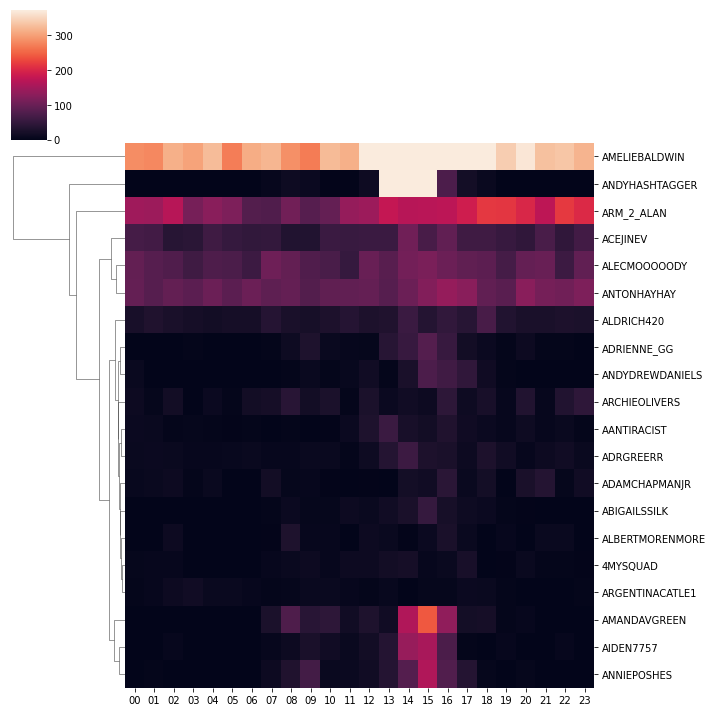

In [ ]:
#Authors tweet activity across the day
store_hr_cnts=defaultdict(list)

for i in user_by_hr_cnt.sort_values(['author','time']).values:
    store_hr_cnts[i[1]].append(i[2])
    
d1=pd.DataFrame(store_hr_cnts,index=sorted(user_by_hr_cnt['author'].unique()))

sns.clustermap(d1,col_cluster=False,robust=True)

### Show how the Large Retweeters Trickle Down:¶
Pick two tweets and show activity by plotting
Work Flow:

Take the top 10-20 Re-tweeters
Sort By Tweet then user
Choose top 10 users for that tweet
We will need to see the time of posting these tweets to see who posted first and trickle down from there.

In [ ]:
# Get Top 10 Retweeters: English
eng_top_10=eng_tweets[eng_tweets['retweet']==1]['author'].value_counts()[:10]

In [ ]:
eng_tweets[eng_tweets['retweet']==1]['author'].value_counts()[:10]

AMELIEBALDWIN     8131
ARM_2_ALAN        3658
ANTONHAYHAY       2427
ALECMOOOOODY      2036
ANDYHASHTAGGER    1541
ACEJINEV          1397
AMANDAVGREEN       842
ALDRICH420         759
ANNIEPOSHES        553
AIDEN7757          518
Name: author, dtype: int64

In [ ]:
eng_tweets[eng_tweets['retweet']==1]['content without http'].value_counts()[:10]

                                                                                                          54
                                                                                                          28
★★★ patriots who dare join our fight to save america ➠ click here                                         27
ste massive obama era food stamp fraud exposed and ended by trump                                         10
enter for your chance to win a                                                                             9
ste trump cracks down on food stamp fraud and it instantly does wonders                                    9
listen to the title track of the upcoming mashup album thefourhorsemen theartofwar ft t                    9
jumping up and down with delight to be retweeted by mr trump realdonaldtrump �� makeamericagreatagain      8
ste traitor jeff flake is now defending obama                                                              8
just posted a photo

In [ ]:
eng_tweets[eng_tweets['retweet']==0]['content without http'].value_counts()[:10]

benghazi liar susan rices treachery continues with trump surveillance  maga pjnet tcot     22
political unmasking of team trump must be prosecuted    maga pjn                           12
                                                                                           11
rescind obamacare rule exempting hypocrites in congress   maga p                           11
 circuit infringes on  amendment  american thinker   nra maga pjnet                        11
is flynns unmasking mccabes revenge   maga pjnet  standwithf                               11
comey fired  now indict hillary clinton  american thinker maga tcot pjnet                   9
debbie dwstweets subverted our democracy not russians   maga pj                             9
colossus of corruption ben rhodes unmasked   maga pjnet tcot                                8
did john brennan collude with foreign spies to help hillary  maga pjnet tcot ccot           8
Name: content without http, dtype: int64

There is a recurrence of Trump and Hilary in these tweets as well as Obama

In [ ]:
key_wrds=['trump','hillary','obama']
str_containing=[]
for i in eng_tweets[eng_tweets['retweet']==1]['content without http'].values:
    if type(i)==str and re.search(key_wrds[0],i):
        str_containing.append(i)
        
str_containing[:15]

['clinton half of trump supporters are in basket of deplorables   —hillary clinton told an audience of donors ',
 'trumps former campaign manager purpose of immigration speech was to lock in white guys  ',
 'the only point of all these tweets is to destroy trust in all news media handy fascist tactic mepfuller  realdonaldtrump',
 'here are all the possible paths to electoral college victory for trump in less than a minute ',
 'great piece by the great ejdionne  opinion  admit it trump is unfit to serve ',
 'and their next plan is back to trump u  his foundation lol they are officially out of ideas  out of ammo ',
 'gen kelly is a worldclass leader and huge addition to a trump cabinet that will keep us safe and finally put americafirst maga ',
 'joyannreid trump aide talks investment with sanctioned kremlin fund ',
 'mark levin to congress investigate obamas silent coup vs trump ',
 'jersey city  celebration report cbs  via   oh oh more proof trump is right����',
 'a cynic might find ir

In [ ]:
eng_tweets[eng_tweets['retweet']==1]['content without http'].\
isin(str_containing).value_counts()

False    23177
True      2841
Name: content without http, dtype: int64

In [ ]:
tr_clin_obama_tweets=eng_tweets[eng_tweets['content without http'].\
isin(str_containing)]

tr_clin_obama_tweets['content without http'].value_counts()[:20]

ste massive obama era food stamp fraud exposed and ended by trump                                                                       10
ste trump cracks down on food stamp fraud and it instantly does wonders                                                                  9
jumping up and down with delight to be retweeted by mr trump realdonaldtrump �� makeamericagreatagain                                    8
ste trumps lawyer going to scotus over blockade of undercover abortion videos                                                            6
ste sick antifa attacked trump supporters during a prayer rally                                                                          5
ste liberal author attacks trumps birther comments forgets one huge problem                                                              5
riots at trumpoc                                                                                                                         5
famous sculptorpredictor of

In [ ]:
top_20_tweets_TR_CLin=list(tr_clin_obama_tweets['content without http'].\
                           value_counts().index[:20])

In [ ]:
tmp=tr_clin_obama_tweets[tr_clin_obama_tweets['retweet']==1]

tmp[tmp['content without http'].\
    isin(top_20_tweets_TR_CLin)]['content without http'].value_counts()[:5]

#None

ste massive obama era food stamp fraud exposed and ended by trump                                         10
ste trump cracks down on food stamp fraud and it instantly does wonders                                    9
jumping up and down with delight to be retweeted by mr trump realdonaldtrump �� makeamericagreatagain      8
ste trumps lawyer going to scotus over blockade of undercover abortion videos                              6
ste liberal author attacks trumps birther comments forgets one huge problem                                5
Name: content without http, dtype: int64

In [ ]:
tmp=tr_clin_obama_tweets[tr_clin_obama_tweets['retweet']==1]

two_tweets_=tmp[tmp['content without http'].\
    isin(top_20_tweets_TR_CLin)]['content without http'].value_counts().index[:2]

# tmp[tmp['kinda_clean_content'].isin(two_tweets_)].sort_values('publish_date')

In [ ]:
two_tweets_=tmp[tmp['content without http'].\
    isin(top_20_tweets_TR_CLin)]['content without http'].value_counts().index[:2]


two_tweets_to_plot=tr_clin_obama_tweets[tr_clin_obama_tweets['content without http'].\
                   isin(two_tweets_)].sort_values('publish_date').reset_index()

two_tweets_to_plot.head()
# .head()

,index,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,content without http,follower_to_following_Ratio,RT_source,hashtags,publish_date_Only,time
0,30658,30708,AMBERRPAR,#ste Massive Obama Era Food Stamp Fraud EXPOSE...,Unknown,English,2017-08-08 05:14:00,0,0,RETWEET,Right,1,RightTroll,894788961121443840,ste massive obama era food stamp fraud exposed...,NaN,None,None,08/08/2017,05
1,36131,36188,AMELINAASTR,#ste Trump Cracks Down on Food Stamp Fraud and...,United States,English,2017-08-08 05:25:00,19,0,RETWEET,Right,1,RightTroll,894791625389428736,ste trump cracks down on food stamp fraud and ...,0.000000,None,None,08/08/2017,05
2,29264,29312,AMELINAASTR,#ste Massive Obama Era Food Stamp Fraud EXPOSE...,United States,English,2017-08-08 05:26:00,19,0,RETWEET,Right,1,RightTroll,894791791571947520,ste massive obama era food stamp fraud exposed...,0.000000,None,None,08/08/2017,05
3,34821,34876,AMIISTRS,#ste Trump Cracks Down on Food Stamp Fraud and...,Unknown,English,2017-08-08 05:33:00,29,2,RETWEET,Right,1,RightTroll,894793590299213825,ste trump cracks down on food stamp fraud and ...,0.068966,None,None,08/08/2017,05
4,13980,14002,AMYYSLEGENTR,#ste Trump Cracks Down on Food Stamp Fraud and...,Unknown,English,2017-08-08 05:51:00,26,1,RETWEET,Right,1,RightTroll,894798177487998976,ste trump cracks down on food stamp fraud and ...,0.038462,None,None,08/08/2017,05


In [ ]:
two_tweets_to_plot['new_time']=two_tweets_to_plot['publish_date'].\
dt.strftime('%m/%d/%Y %H:%M')

In [ ]:
first_tweet=two_tweets_to_plot.iloc[:18,:]

second_tweet=two_tweets_to_plot.iloc[18:,:].reset_index()

In [ ]:
from datetime import datetime


def time_to_int(df_to_parse,starting_point):
    ll=[]
    for i in df_to_parse:
        FMT = '%m/%d/%Y %H:%M'
        tdelta = datetime.strptime(i, FMT) -\
        datetime.strptime(starting_point, FMT)
        convrt_mins=float(tdelta.total_seconds())/60
        if tdelta.total_seconds() <10800:
            ll.append(int(tdelta.total_seconds())/60)
        else:
            ll.append('Nope')
    return ll
# len(ll)

first_tweet['min_ints']=time_to_int(first_tweet['new_time'],first_tweet['new_time'][0])

# second_tweet

<ipython-input-50-df07cc0d23b3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_tweet['min_ints']=time_to_int(first_tweet['new_time'],first_tweet['new_time'][0])


In [ ]:
second_tweet['min_ints']=time_to_int(second_tweet['new_time'],second_tweet['new_time'][0])

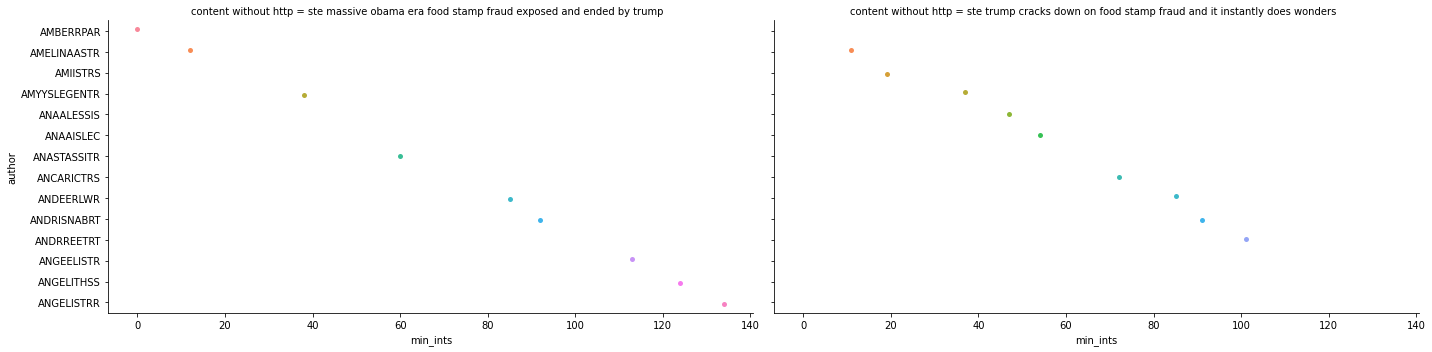

In [ ]:
# This plot shows the amplification of sample tweet from first author to last
sns.catplot(data=first_tweet,x='min_ints',y='author',
                    col='content without http',aspect=2)

From the above, we can see a ripple of the tweet from the original author

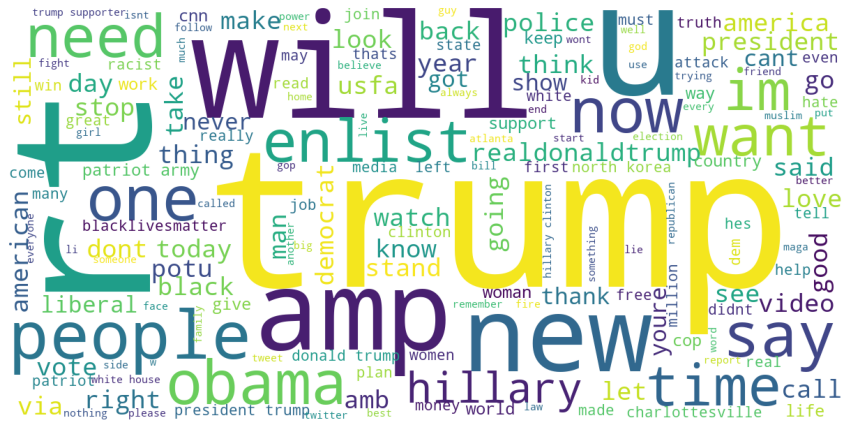

In [ ]:
#WordCloud after some data cleaning
text = ' '.join([str(x) for x in data['content without http']])

wc = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=200,scale=3).generate(text)
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

In [ ]:
#The most popular words are electoral keywords: Trump, Hillary, Obama, vote, democrat
#Also popular trends in America: blacklivesmatter
#Dataset could still use a bit of cleaning too